# Figure S5. Extended ColocBoost xQTL analysis in aging human brain.

ColocBoost was applied to 17 gene-level cis-xQTL datasets from the aging brain cortex of ROSMAP subjects.

- **S5a**. UpSet plot summarizing the top 80 colocalized events in xQTL-only ColocBoost analysis across 17 molecular traits. 
- **S5b**. UpSet plot displaying colocalization patterns across 3 molecular modalities (expression, splicing, and protein abundance) restricted to 3,655 genes with data available for all modalities.
- **S5c**. The fraction of cell-type specific fine-mapping (measuring as 95% credible sets) for different brain cell types, that are recovered by cell-type specific colocalizations separately.
- **S5d**. Summary of cell-type specific and cell-type shared colocalization events from (left penal) xQTL colocalization analysis spanning 17 molecular traits, and (right panel) eQTL colocalization analysis spanning eQTL data from 6 brain cell types and 4 bulk tissues. The diagonal entries indicate the number of cell-type specific colocalizations and off-diagonal entries indicate the number of colocalizations shared between each pairs of cell types.
- **S5e**. Excess-of-overlap (EOO) analysis of the cell-type specific colocalization of eGenes with cell-type gene programs from external brain single-cell RNA-seq data.

## Figure S5a
UpSet plot summarizing the top 80 colocalized events in xQTL-only ColocBoost analysis across 17 molecular traits.

In [2]:
library("UpSetR")
res = readRDS("../../Main_Figures/Figure_3/data/xQTL_only_colocalization.rds")
all_pheno <- c("Mic","Ast","Oli","OPC","Exc","Inh","DLPFC","AC","PCC","Monocyte","pQTL",
               "AC_productive","AC_unproductive","DLPFC_productive","DLPFC_unproductive","PCC_productive","PCC_unproductive")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp){ strsplit(cp, "; ")[[1]] })
coloc <- lapply(all_pheno, function(y) {
  pos <- sapply(coloc_pheno, function(cp) y %in% cp ) 
  which(pos)
})
names(coloc) <- all_pheno
coloc_xQTL <- coloc[c(1:10, 14,15, 12,13, 16,17, 11)]
names(coloc_xQTL) <- c("Mic (DLPFC)", "Ast (DLPFC)", "Oli (DLPFC)", "OPC (DLPFC)", "Exc (DLPFC)", "Inh (DLPFC)",
                       "eQTL (DLPFC)", "eQTL (AC)", "eQTL (PCC)", "eQTL (Monocyte)",
                       "p-sQTL (DLPFC)", "u-sQTL (DLPFC)", "p-sQTL (AC)", "u-sQTL (AC)", "p-sQTL (PCC)", "u-sQTL (PCC)",
                       "pQTL (DLPFC)")
max_size <- max(sapply(coloc_xQTL, length))
p1 <- upset(fromList(coloc_xQTL),
            order.by = "freq",
            keep.order = T,
            main.bar.color = "steelblue3",
            sets.bar.color = "sandybrown",
            text.scale = c(2.5,2,2.5,2,2,0), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = c("Mic (DLPFC)", "OPC (DLPFC)", "Oli (DLPFC)", "Ast (DLPFC)", "Exc (DLPFC)", "Inh (DLPFC)",
                     "eQTL (DLPFC)", "eQTL (AC)", "eQTL (PCC)", "eQTL (Monocyte)",
                     "u-sQTL (DLPFC)", "p-sQTL (DLPFC)", "u-sQTL (AC)", "p-sQTL (AC)", "u-sQTL (PCC)", "p-sQTL (PCC)", "pQTL (DLPFC)"),
            nsets = length(coloc_xQTL),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.55*max_size,
            nintersects = 80,
            mainbar.y.label = "Number of 95% CoS for\n each causal configuration",
            sets.x.label = NULL)

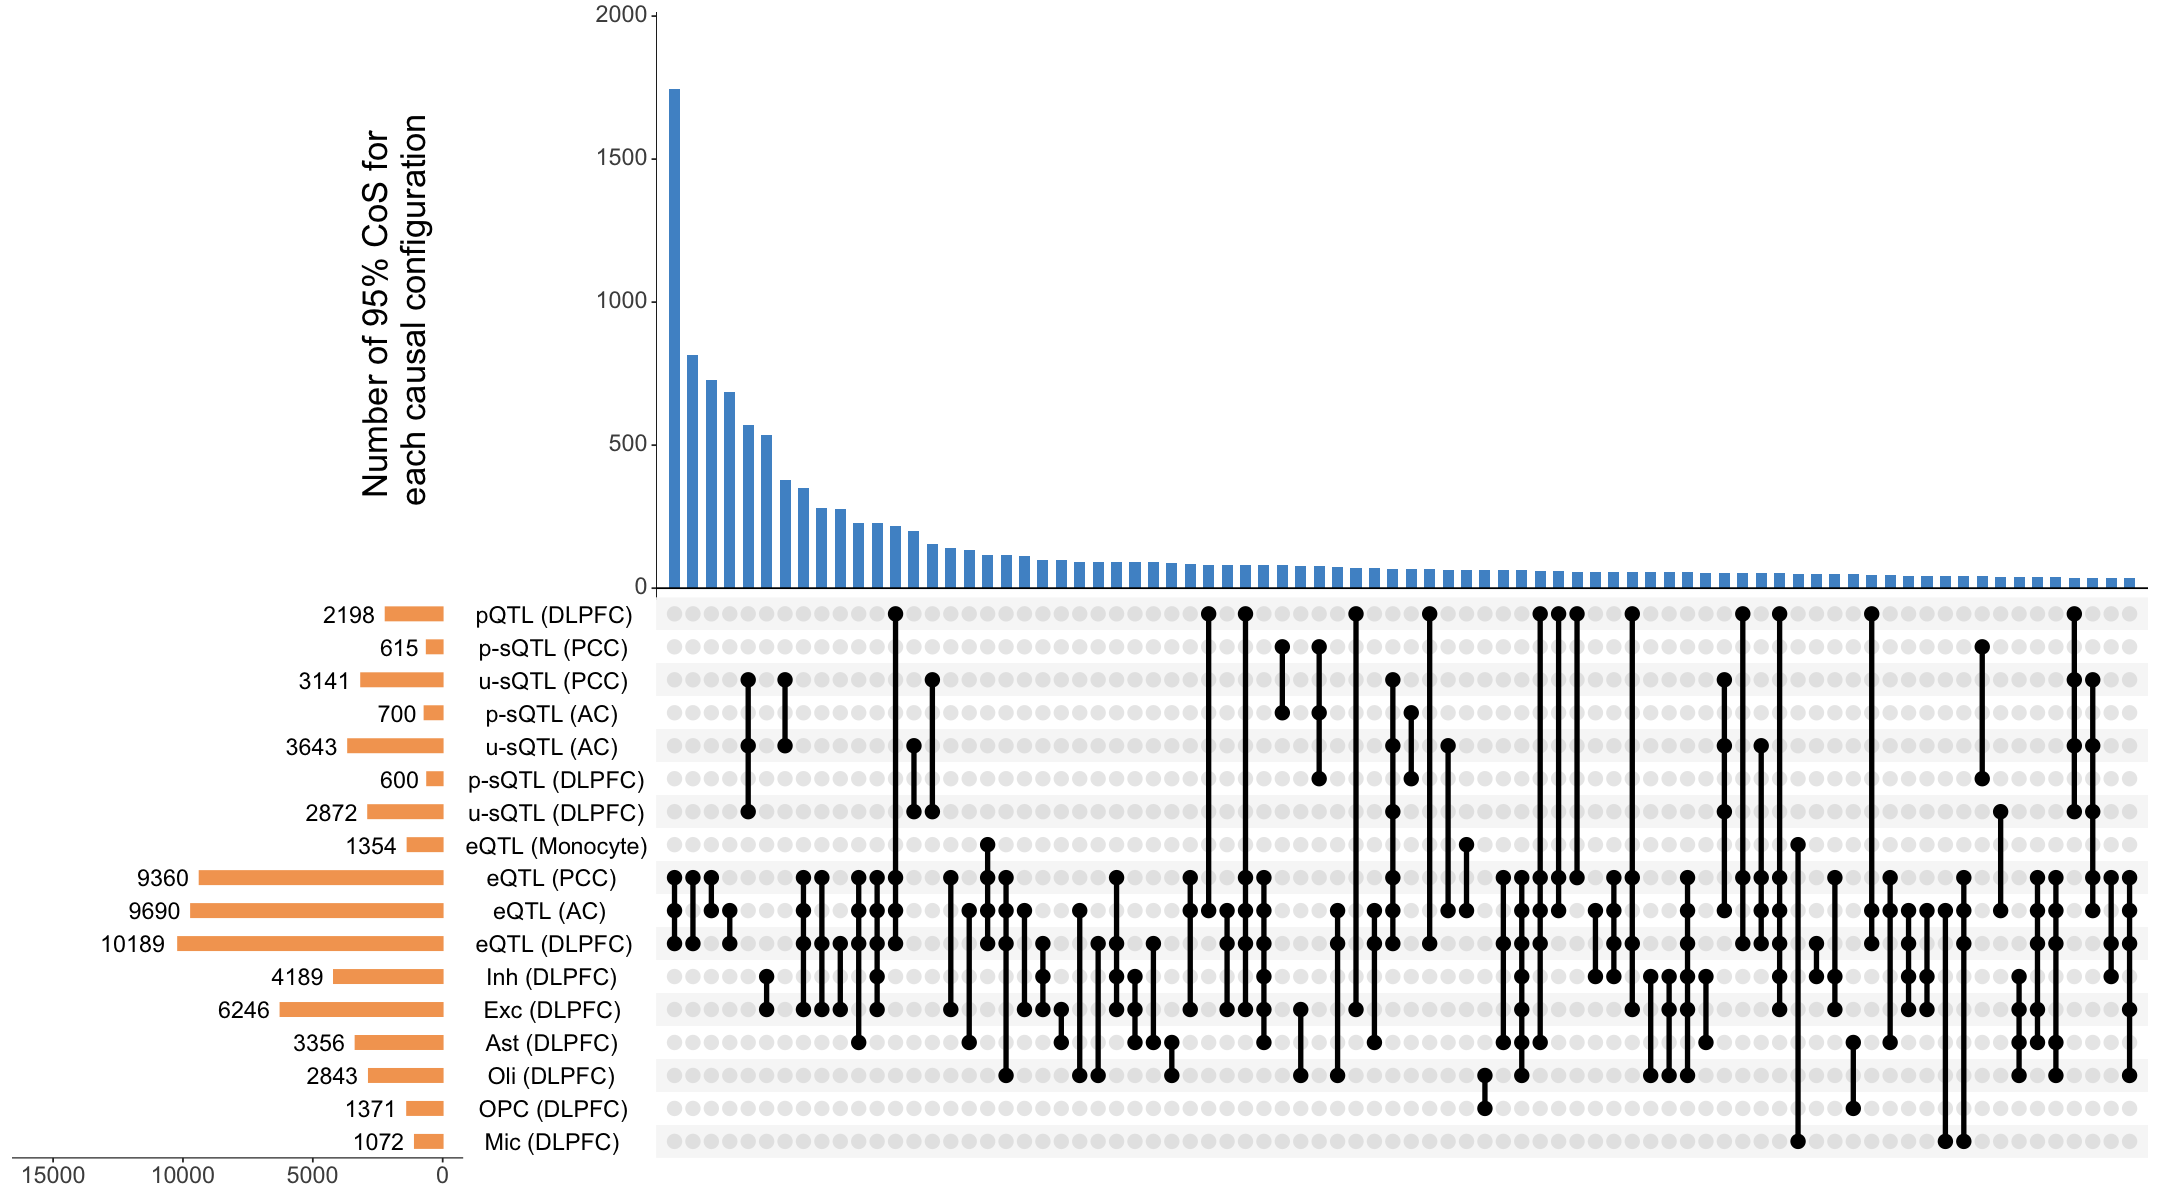

In [5]:
options(repr.plot.width = 18, repr.plot.height = 10)
p1

## Figure S5b
UpSet plot displaying colocalization patterns across 3 molecular modalities (expression, splicing, and protein abundance) restricted to 3,655 genes with data available for all modalities.

In [13]:
library("UpSetR")
res = readRDS("../../Main_Figures/Figure_3/data/xQTL_only_colocalization.rds")
genes <- read.table("Figure_S5b_three_xQTL_genes.txt", header = T)$x
library(tidyverse)
res <- res %>% filter(gene %in% genes)
all_pheno <- c("Mic","Ast","Oli","OPC","Exc","Inh","DLPFC","AC","PCC","Monocyte","pQTL",
               "AC_productive","AC_unproductive","DLPFC_productive","DLPFC_unproductive","PCC_productive","PCC_unproductive")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp){ strsplit(cp, "; ")[[1]] })
coloc <- lapply(all_pheno, function(y) {
  pos <- sapply(coloc_pheno, function(cp) y %in% cp ) 
  which(pos)
})
names(coloc) <- all_pheno
coloc_eQTL <- unique(unlist(coloc[1:10]))
coloc_pQTL <- coloc[[11]]
coloc_sQTL <- unique(unlist(coloc[12:17]))
coloc_xQTL <- list("eQTL" = coloc_eQTL,
                   "pQTL" = coloc_pQTL,
                   "sQTL" = coloc_sQTL)
names(coloc_xQTL) <- c("   eQTL\n (10 contexts)", "  pQTL\n (1 context)", "   sQTL\n (6 contexts)")
library("UpSetR")
library("ggplot2")
max_size <- max(sapply(coloc_xQTL, length))
p1 <- upset(fromList(coloc_xQTL),
            order.by = "freq",
            keep.order = T,
            main.bar.color = "steelblue3",
            sets.bar.color = "sandybrown",
            text.scale = c(2,2,3,2,2,2.3), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 6, line.size = 1.5,
            sets = c("  pQTL\n (1 context)", "   sQTL\n (6 contexts)", "   eQTL\n (10 contexts)"),
            nsets = length(coloc_xQTL),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.55*max_size,
            nintersects = 25,
            mainbar.y.label = "Number of 95% CoS for\n each configuration",
            sets.x.label = NULL)

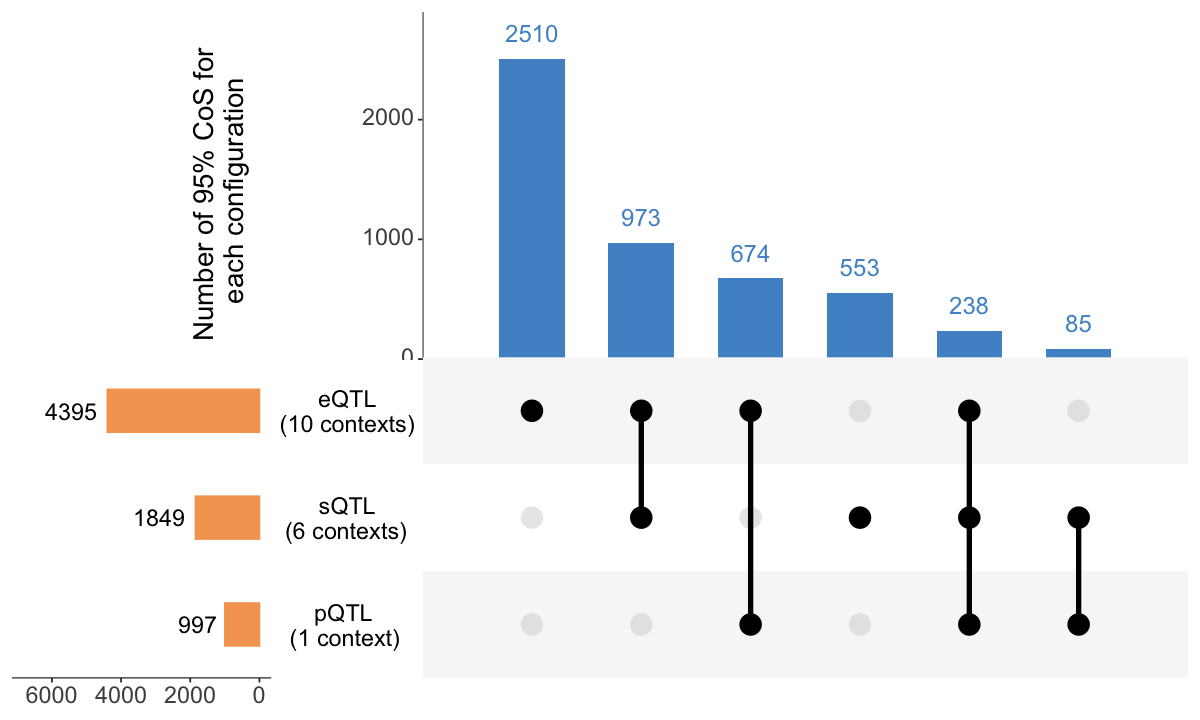

In [14]:
options(repr.plot.width = 10, repr.plot.height = 6)
p1

## Figure S5c
The fraction of cell-type specific fine-mapping (measuring as 95% credible sets) for different brain cell types, that are recovered by cell-type specific colocalizations separately.

In [16]:
library(ggsci)
data = readRDS("Figure_S5c.rds")
p <- ggplot(data, aes(y = CellType, x = Count, fill = Status)) +
  geom_bar(stat = "identity", position = "stack") + # Stacked bar chart
  scale_fill_npg() +
  labs(
    x = "Number of CoS",
    y = NULL,
    fill = "Proportion",
    title = "Cell-type specific fine-mapping"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text( size = 28, hjust = 0.5 ),
    axis.title.x = element_text( margin = margin(t = 0), size = 24), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 24), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = 0), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    legend.position = "inside",
    legend.justification = c(0.95, 0.95),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )


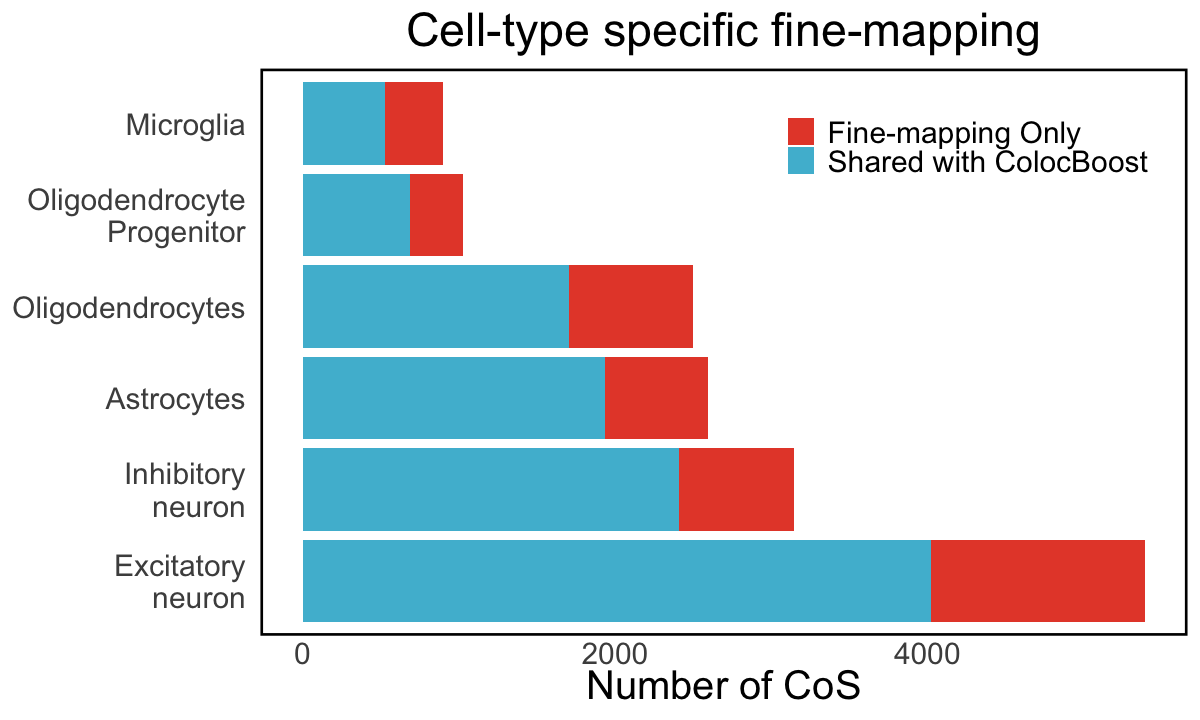

In [17]:
options(repr.plot.width = 10, repr.plot.height = 6)
p

## Figure S5d
Summary of cell-type specific and cell-type shared colocalization events from (left penal) xQTL colocalization analysis spanning 17 molecular traits, and (right panel) eQTL colocalization analysis spanning eQTL data from 6 brain cell types and 4 bulk tissues. The diagonal entries indicate the number of cell-type specific colocalizations and off-diagonal entries indicate the number of colocalizations shared between each pairs of cell types.

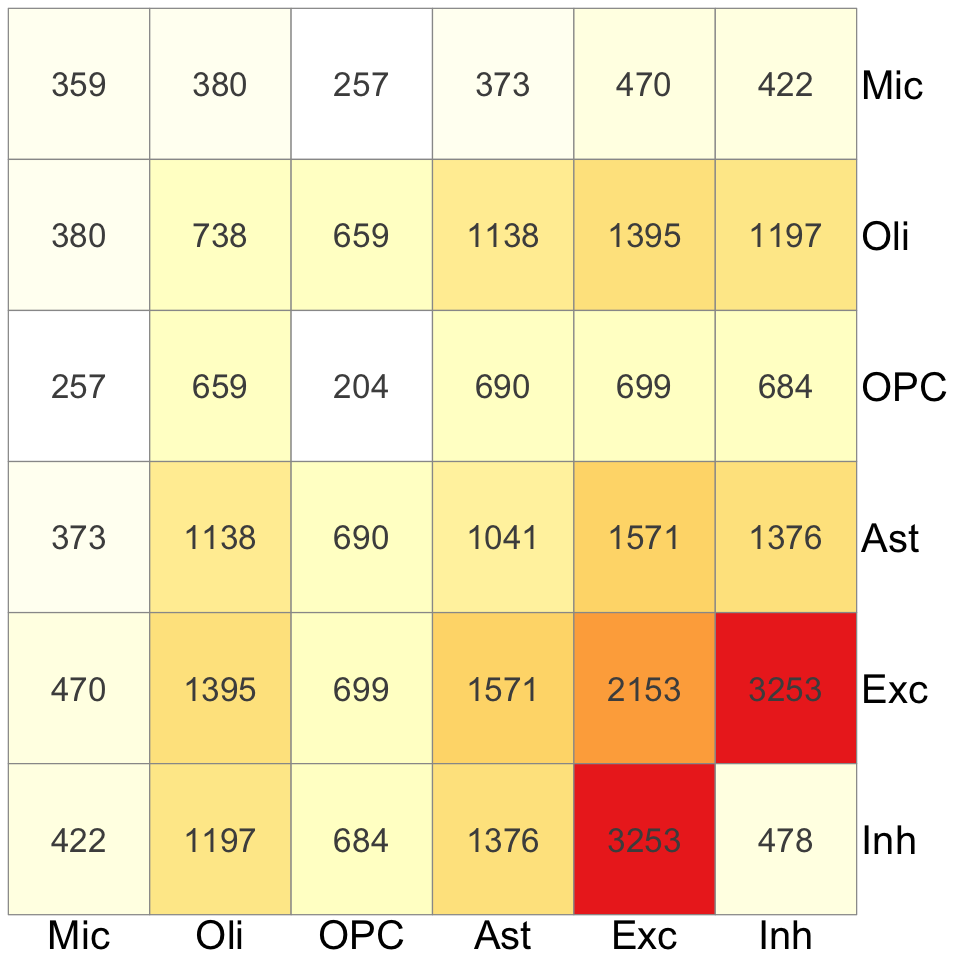

In [19]:
options(repr.plot.width = 8, repr.plot.height = 8)
pair_xQTL = readRDS("Figure_S5d_xQTL.rds")
library(RColorBrewer)
color_palette <- colorRampPalette(c("white", brewer.pal(n = 9, name = 'YlOrRd')))(38)[1:28]
pheatmap::pheatmap(pair_xQTL, cluster_rows = FALSE, cluster_cols = FALSE,
                   display_numbers = TRUE, number_format = "%.0f",
                   fontsize = 16,
                   fontsize_row = 24,
                   fontsize_col = 24,
                   fontsize_number = 20,
                   angle_col = 0,
                   color = color_palette,
                   legend = FALSE
)

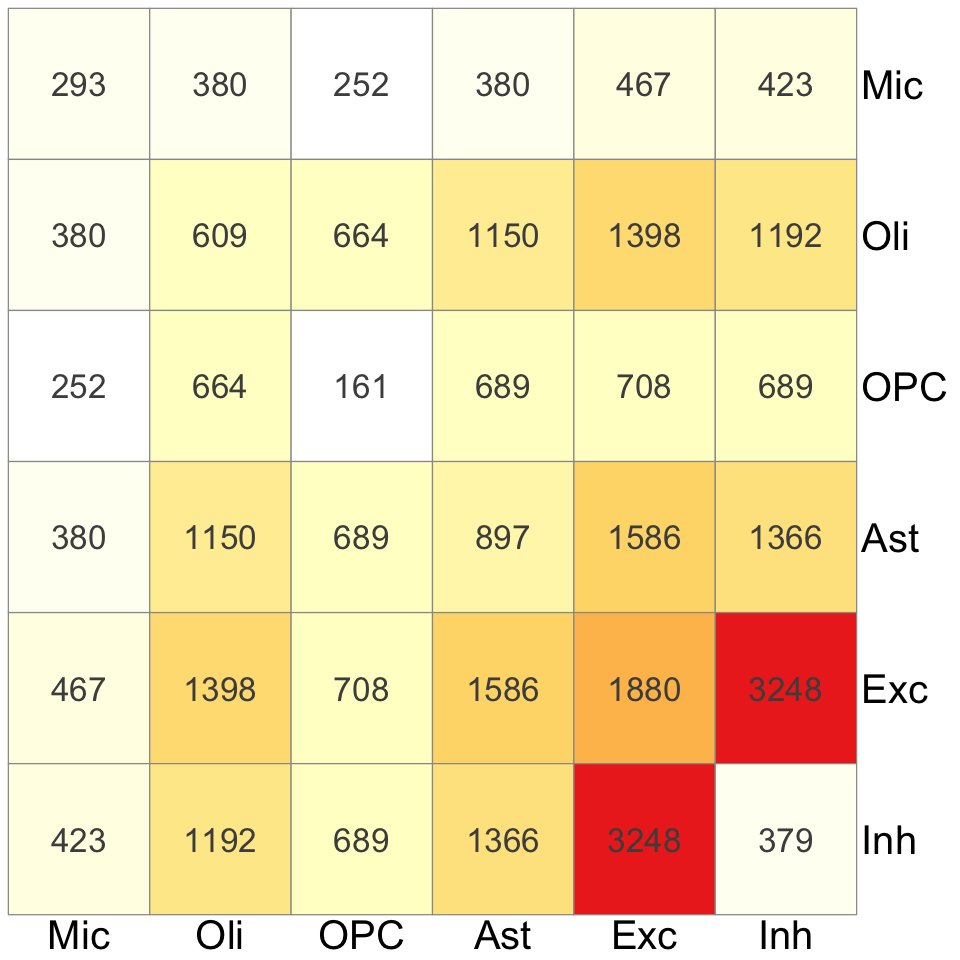

In [20]:
options(repr.plot.width = 8, repr.plot.height = 8)
pair_xQTL = readRDS("Figure_S5d_eQTL.rds")
library(RColorBrewer)
color_palette <- colorRampPalette(c("white", brewer.pal(n = 9, name = 'YlOrRd')))(38)[1:28]
pheatmap::pheatmap(pair_xQTL, cluster_rows = FALSE, cluster_cols = FALSE,
                   display_numbers = TRUE, number_format = "%.0f",
                   fontsize = 16,
                   fontsize_row = 24,
                   fontsize_col = 24,
                   fontsize_number = 20,
                   angle_col = 0,
                   color = color_palette,
                   legend = FALSE
)

## Figure S5e
Excess-of-overlap (EOO) analysis of the cell-type specific colocalization of eGenes with cell-type gene programs from external brain single-cell RNA-seq data.

In [23]:
Enrich = readRDS("Figure_S5e.rds")
library(ggplot2)
library(reshape2)
corr_melt <- melt(Enrich)
p1 <- ggplot(corr_melt, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "white", high = "#E41C1C", mid = "#FEC661", 
                       midpoint = 7, limit = c(0.5, 13), space = "Lab", 
                       name="Enrichment") +
  labs(title = "Enrichment with cell-type genes", x = "", y = "") +
  theme_minimal(base_size = 15) + 
  theme(plot.title = element_text( size = 26 ),
        axis.text.x = element_text(size = 22),
        axis.text.y = element_text(size = 22),
        panel.grid = element_blank(),
        legend.position = "none") +
  coord_fixed() +
  geom_text(aes(Var1, Var2, label = round(value, 2)), color = "black", size = 6)


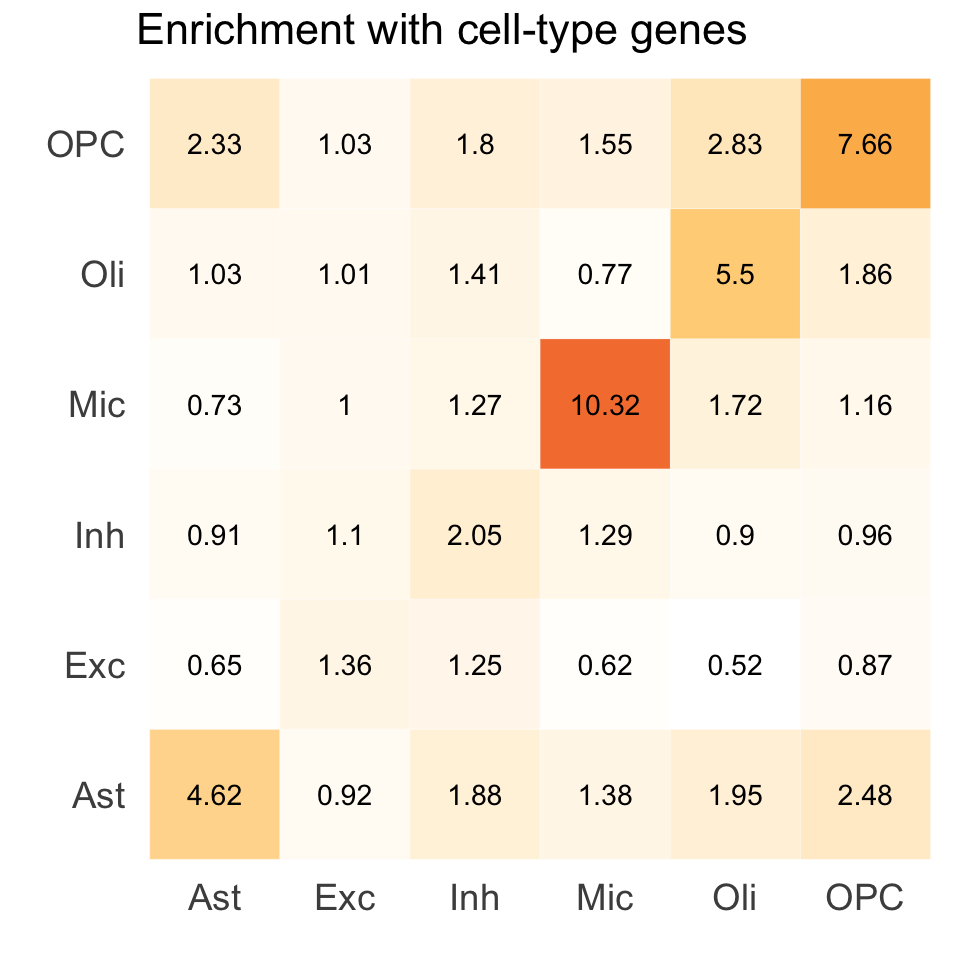

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1